In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re 
import os
import subprocess

REPO_PATH = subprocess.check_output(['git', 'rev-parse', '--show-toplevel']).decode('utf-8').strip()
plt.style.use(f'{REPO_PATH}/misc/edwin.mplstyle')

## OpenFoam solver

In [6]:
probePath = "./simpleColumn/postProcessing/probes/0.000/h"
widths = [14]*6
names = ['Time'] + [f"Probe {i}" for i in range(5)]
OpenFoamData_h = pd.read_fwf(probePath, widths=widths,skiprows=7,names=names)

In [7]:
probePath = "./simpleColumn/postProcessing/probes/0.000/theta"
widths = [14]*6
names = ['Time'] + [f"Probe {i}" for i in range(5)]
OpenFoamData_theta = pd.read_fwf(probePath, widths=widths,skiprows=7,names=names)

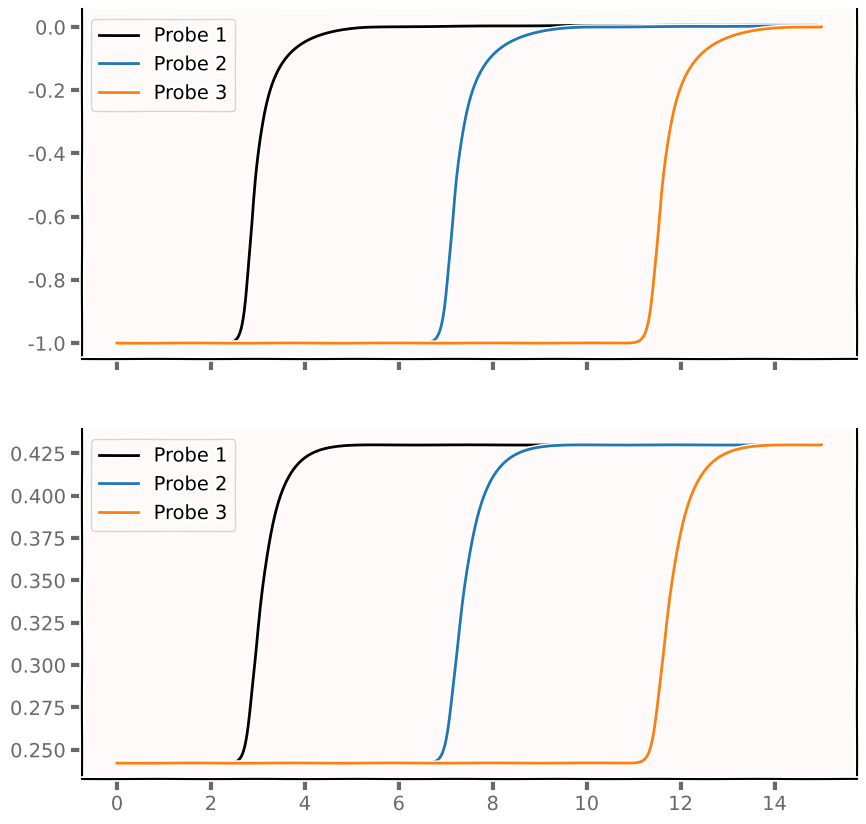

In [8]:
with plt.xkcd(scale=0.1, randomness=1):
    fig,axs = plt.subplots(2,1,sharex=True,figsize=[10,10])
    for probe in names[2:-1]:
        axs[0].plot(OpenFoamData_h['Time']/3600,OpenFoamData_h[probe],label=probe)
        axs[1].plot(OpenFoamData_theta['Time']/3600,OpenFoamData_theta[probe],label=probe)

    for ax in axs:
        ax.legend()
    plt.show()

## Hydrus-1D

In [9]:
probePath = "./simpleColumn_Hydrus1D/Orgogozo2014/ORGOGOZO/Obs_Node.out"  
with open(probePath,'r') as f:
    rawHydrusData = f.readlines()[11:-1]
    rawHydrusData = [line.strip() for line in rawHydrusData]
    rawHydrusData = [re.sub("[ ]+", ",", line) for line in rawHydrusData]
    rawHydrusData = np.array([[float(i) for i in line.split(",")] for line in rawHydrusData])

names = ['Time'] + ['head_1','theta_1','flux_1'] + ['head_2','theta_2','flux_2'] + ['head_3','theta_3','flux_3']
HydrusData = pd.DataFrame(rawHydrusData,columns=names)

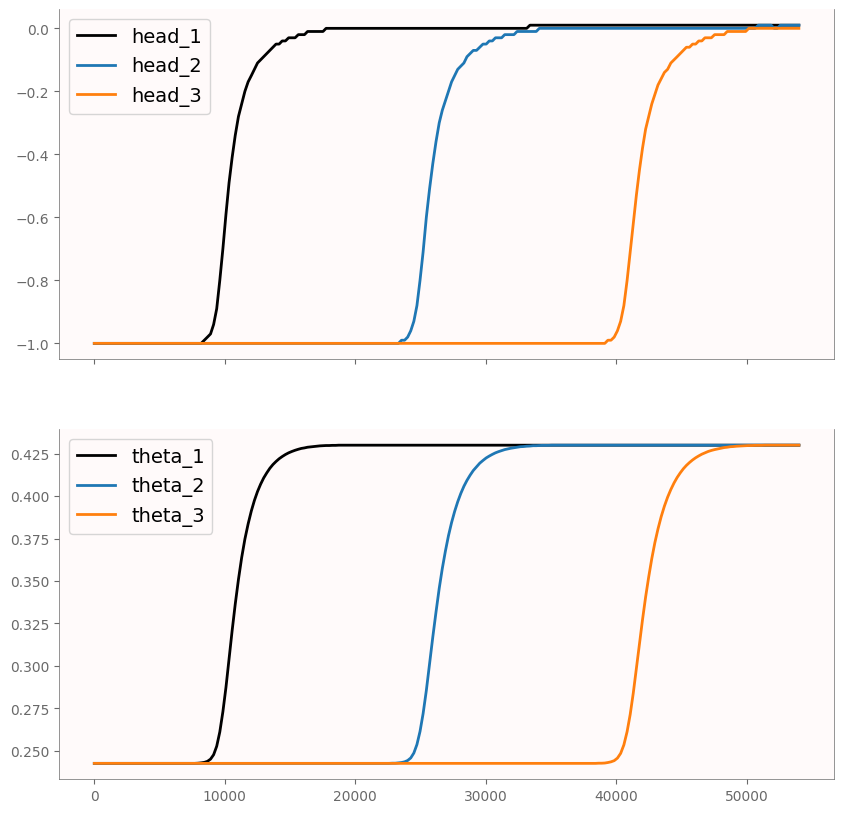

In [10]:
fig,axs = plt.subplots(2,1,sharex=True,figsize=[10,10])
for probe in names[1:]:
    if "head" in probe:
        axs[0].plot(HydrusData['Time'],HydrusData[probe],label=probe)
    elif "theta" in probe:
        axs[1].plot(HydrusData['Time'],HydrusData[probe],label=probe)

for ax in axs:
    ax.legend()
plt.show()

## PFLOTRAN

In [11]:
probePath = "./simpleColumn_PFLOTRAN/100_z-obs-0.pft"
with open(probePath,'r') as f:
    names = f.readline()
names = names.lstrip().replace('"','').replace('\n','').split(",")
names = [re.sub("[\(].*?[\)]", "", name) for name in names]
widths = [14]*len(names)

PFLOTRANData = pd.read_fwf(probePath, widths=widths, skiprows=1,names=names)
#PFLOTRANData["h (m)"] = (PFLOTRANData["Liquid Pressure Pa"]-101325)/9806.38

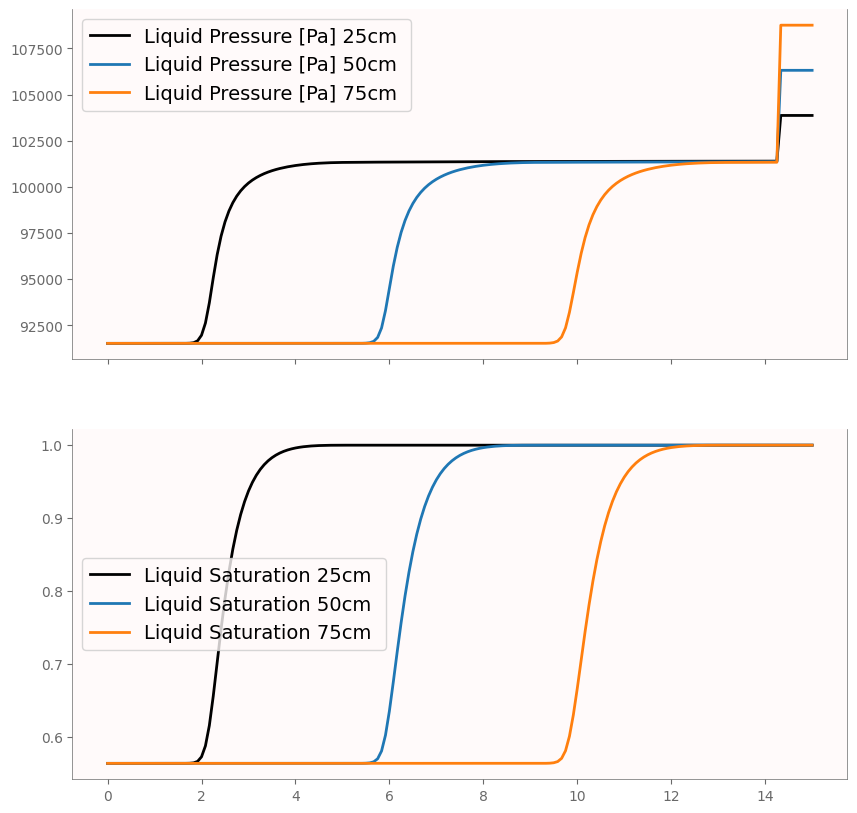

In [12]:
fig,axs = plt.subplots(2,1,sharex=True,figsize=[10,10])
for probe in names[1:]:
    if "Pressure" in probe:
        axs[0].plot(PFLOTRANData['Time [hour]'],PFLOTRANData[probe],label=probe)
    elif "Saturation" in probe:
        axs[1].plot(PFLOTRANData['Time [hour]'],PFLOTRANData[probe],label=probe)

for ax in axs:
    ax.legend()
plt.show()

## RichardsFoam3

In [13]:
probePath = "./simpleColumn_RichardsFoam/postProcessing/probes/0/H"
widths = [14]*6
names = ['Time'] + [f"Probe {i}" for i in range(5)]
RichardsFoamData_h = pd.read_fwf(probePath, widths=widths,skiprows=7,names=names)

RichardsFoamData_h["Probe 1"] = RichardsFoamData_h["Probe 1"] + 0.25 - 1
RichardsFoamData_h["Probe 2"] = RichardsFoamData_h["Probe 2"] + 0.50 - 1
RichardsFoamData_h["Probe 3"] = RichardsFoamData_h["Probe 3"] + 0.75 - 1

In [14]:
probePath = "./simpleColumn_RichardsFoam/postProcessing/probes/0/theta"
widths = [14]*6
names = ['Time'] + [f"Probe {i}" for i in range(5)]
RichardsFoamData_theta = pd.read_fwf(probePath, widths=widths,skiprows=7,names=names)

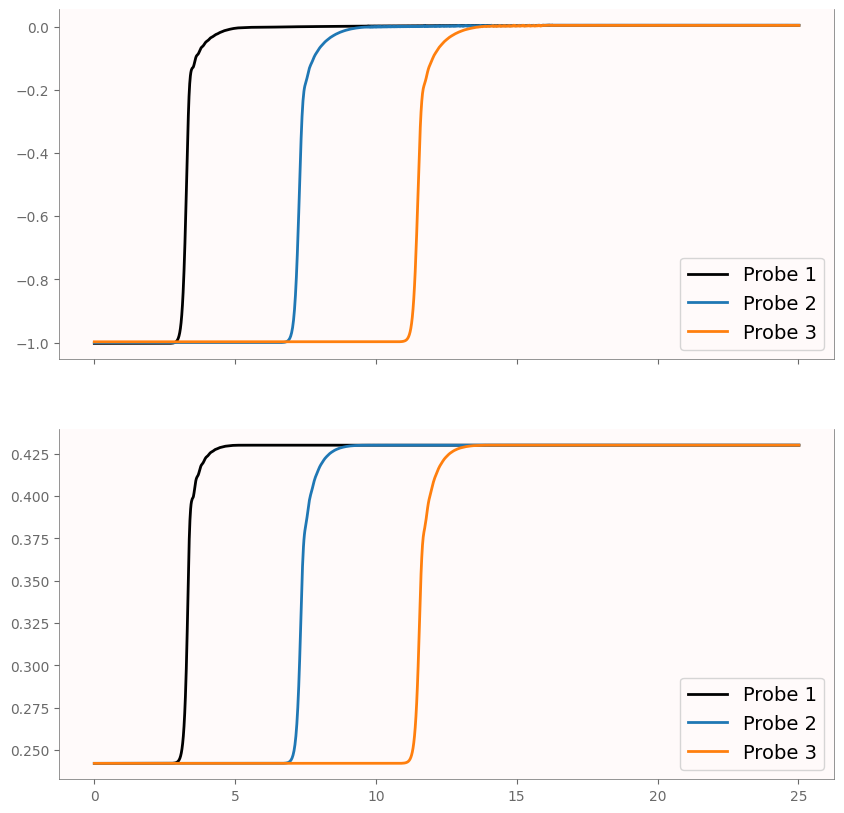

In [15]:
fig,axs = plt.subplots(2,1,sharex=True,figsize=[10,10])
for probe in names[2:-1]:
    axs[0].plot(RichardsFoamData_h['Time']/3600,RichardsFoamData_h[probe],label=probe)
    axs[1].plot(RichardsFoamData_theta['Time']/3600,RichardsFoamData_theta[probe],label=probe)

for ax in axs:
    ax.legend()
plt.show()

## Head comparison

findfont: Font family ['xkcd', 'xkcd Script', 'Humor Sans', 'Comic Neue', 'Comic Sans MS'] not found. Falling back to DejaVu Sans.
findfont: Font family ['xkcd', 'xkcd Script', 'Humor Sans', 'Comic Neue', 'Comic Sans MS'] not found. Falling back to DejaVu Sans.


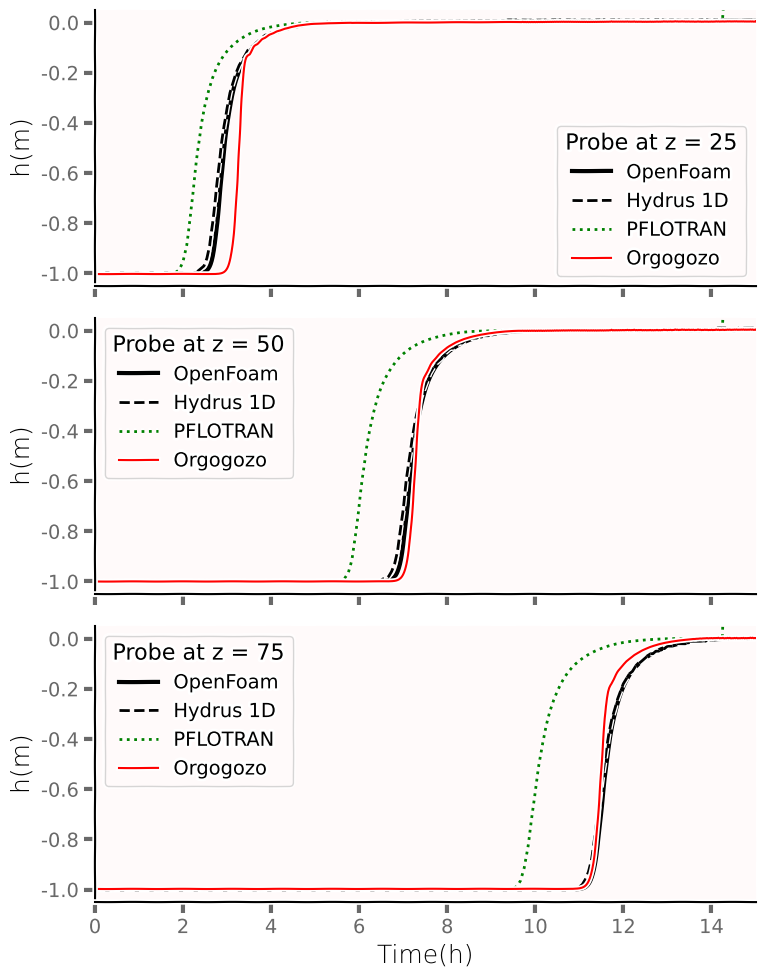

In [16]:
with plt.xkcd(scale=0.1, length=50, randomness=1):
#with plt.style.context('seaborn-deep'):
    fig,axs = plt.subplots(3,figsize=(8,10),tight_layout=True,sharex=True)
    for ax,probe in zip(axs,OpenFoamData_h.columns[2:-1]):
        ax.plot(OpenFoamData_h['Time']/3600,OpenFoamData_h[probe],lw=3,label="OpenFoam")
    
    for ax,probe in zip(axs,[i for i in HydrusData.columns[1:] if "head" in i]):
        ax.plot(HydrusData['Time']/3600,HydrusData[probe],ls='dashed',c='k',lw=2,label="Hydrus 1D")

    for ax,probe in zip(axs,[i for i in PFLOTRANData.columns[1:] if "Pressure" in i]):
        ax.plot(PFLOTRANData['Time [hour]'],(PFLOTRANData[probe]-101325)/9806.38,ls='dotted',c='g',lw=2, label="PFLOTRAN")

    for ax,probe in zip(axs,RichardsFoamData_h.columns[2:-1]):
        ax.plot(RichardsFoamData_h['Time']/3600,RichardsFoamData_h[probe],c='r',lw=1.5, label="Orgogozo")
    
    ax.set_xlabel("Time(h)",fontsize=18)

    for ax in axs:
        ax.set_ylabel("h(m)",fontsize=18)    
        ax.set_xlim([0,15])
        ax.set_ylim([-1.05,.05])
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
    
    for ax,depth in zip(axs,(25,50,75)):
        ax.legend(title=f"Probe at z = {depth}",fontsize=14,title_fontsize=16)
    
    fileForPNG = f"CompareWetFronts.png"
    #fig.savefig(fileForPNG);
    #os.system(f"xclip -se c -t image/png -i {fileForPNG}") # Does not work when ssh
    
    plt.show()

## Water content comparison

findfont: Font family ['xkcd', 'xkcd Script', 'Humor Sans', 'Comic Neue', 'Comic Sans MS'] not found. Falling back to DejaVu Sans.


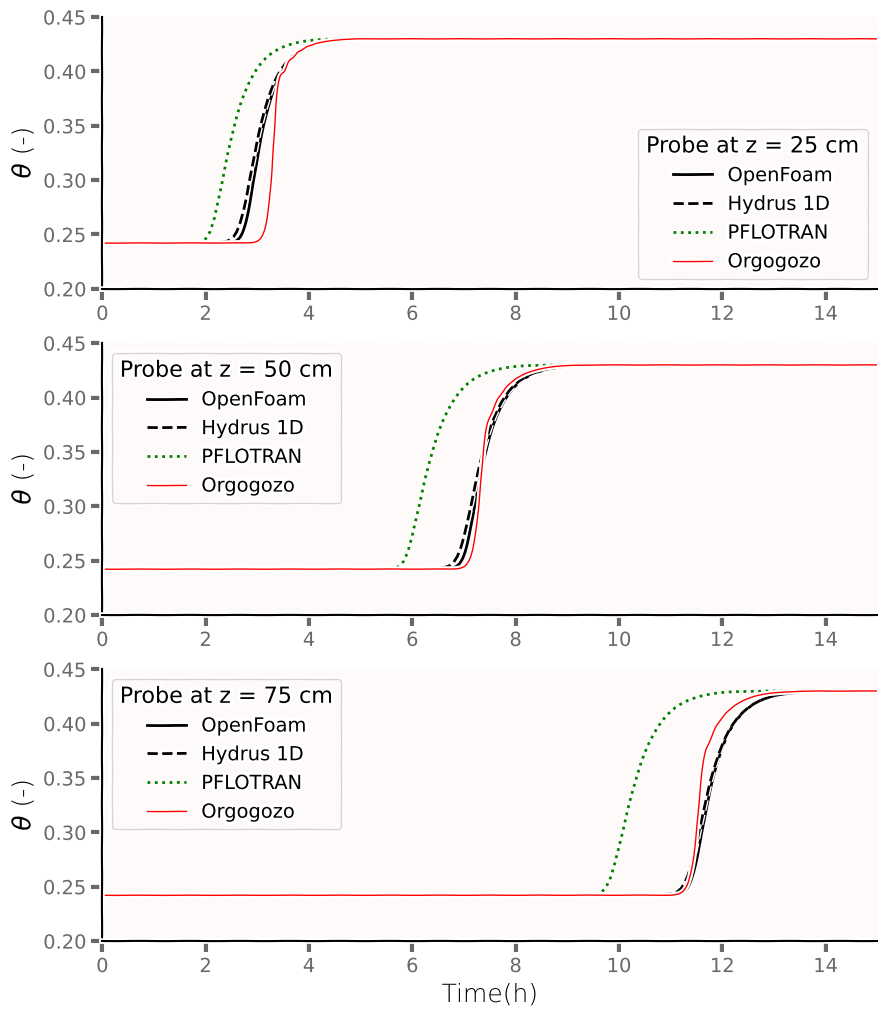

In [17]:
with plt.xkcd(scale=0.1, length=50, randomness=1):
#with plt.style.context('seaborn-deep'):
    fig,axs = plt.subplots(3,figsize=(10,12))
    for ax,probe in zip(axs,OpenFoamData_theta.columns[2:-1]):
        ax.plot(OpenFoamData_theta['Time']/3600,OpenFoamData_theta[probe],label="OpenFoam")
    
    for ax,probe in zip(axs,[i for i in HydrusData.columns[1:] if "theta" in i]):
        ax.plot(HydrusData['Time']/3600,HydrusData[probe],ls='dashed',c='k',lw=2,label="Hydrus 1D")

    for ax,probe in zip(axs,[i for i in PFLOTRANData.columns[1:] if "Saturation" in i]):
        ax.plot(PFLOTRANData['Time [hour]'],PFLOTRANData[probe]*0.430,ls='dotted',c='g',lw=2, label="PFLOTRAN")

    for ax,probe in zip(axs,RichardsFoamData_theta.columns[2:-1]):
        ax.plot(RichardsFoamData_theta['Time']/3600,RichardsFoamData_theta[probe],c='r',lw=1, label="Orgogozo")
    
    ax.set_xlabel("Time(h)",fontsize=18)

    for ax in axs:
        ax.set_ylabel(r"$\theta$ (-)",fontsize=18)    
        ax.set_xlim([0,15])
        ax.set_ylim([0.20,0.45])
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
    
    for ax,depth in zip(axs,(25,50,75)):
        ax.legend(title=f"Probe at z = {depth} cm",fontsize=14,title_fontsize=16)
    
    plt.show()

## Retention curve

findfont: Font family ['xkcd', 'xkcd Script', 'Humor Sans', 'Comic Neue', 'Comic Sans MS'] not found. Falling back to DejaVu Sans.


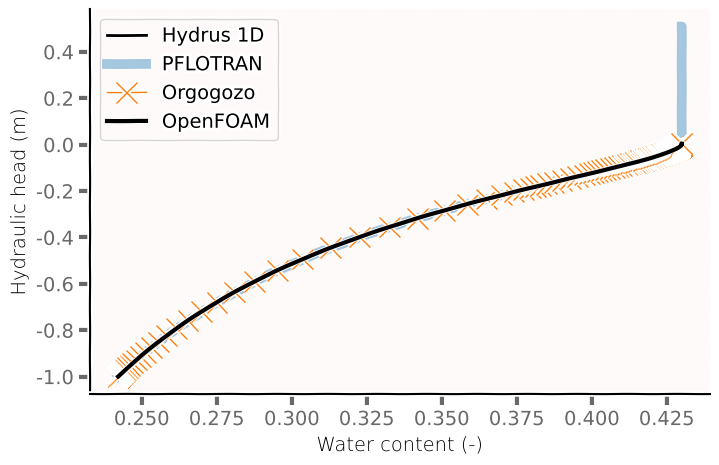

In [18]:
with plt.xkcd(scale=0.1, length=50, randomness=1):
    fig,ax = plt.subplots(figsize=(8,5))
    ax.plot(HydrusData['theta_2'],HydrusData['head_2'],
            lw=2,label="Hydrus 1D")
    ax.plot(PFLOTRANData['Liquid Saturation 50cm ']*0.43,(PFLOTRANData['Liquid Pressure [Pa] 50cm ']-101325)/9806.38,
            lw=7, alpha=0.4,label="PFLOTRAN")
    ax.plot(RichardsFoamData_theta['Probe 2'], RichardsFoamData_h['Probe 2'],
            lw=1, marker='x',ms=15,label="Orgogozo")
    ax.plot(OpenFoamData_theta['Probe 2'],OpenFoamData_h['Probe 2'],
            lw=3,c='k',label="OpenFOAM")
    ax.set_xlabel("Water content (-)")
    ax.set_ylabel("Hydraulic head (m)")
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.legend()
    plt.show()